In [333]:
# import sys
#
# !{sys.executable} -m pip install numpy | find /V "already satisfied"
# !{sys.executable} -m pip install pandas | find /V "already satisfied"
# !{sys.executable} -m pip install scikit-learn | find /V "already satisfied"
# !{sys.executable} -m pip install matplotlib | find /V "already satisfied"
# !{sys.executable} -m pip install seaborn | find /V "already satisfied"
# !{sys.executable} -m pip install dabl | find /V "already satisfied"
# !{sys.executable} -m pip install autoviz | find /V "already satisfied"
# !{sys.executable} -m pip install shap | find /V "already satisfied"
# !{sys.executable} -m pip install plotly | find /V "already satisfied"

In [334]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
import joblib
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
warnings.filterwarnings('ignore')



In [391]:
df=pd.read_csv("..\Dataset\RTA Dataset.csv")

In [336]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [338]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [339]:
df.shape

(12316, 32)

In [340]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [341]:
df.describe(include=['object']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [342]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [343]:
df.duplicated().sum()

0

In [344]:
df['Time']=pd.to_datetime(df['Time'])

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [346]:
df['hour']=df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop("Time",inplace=True,axis=1)

In [347]:
df.shape

(12316, 33)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [349]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

In [350]:
df.columns = df.columns.str.lower()

In [351]:
df.describe()

,number_of_vehicles_involved,number_of_casualties,hour,minute
count,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,13.835823,27.696736
std,0.688790,1.007179,5.202923,17.482604
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,10.000000,12.000000
50%,2.000000,1.000000,15.000000,30.000000
75%,2.000000,2.000000,18.000000,43.000000
max,7.000000,8.000000,23.000000,59.000000


In [352]:
df.head()

,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,...,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


In [353]:
# df2=df.groupby(['day_of_week']).size()
# df2=df2.sort_values()
# fig= plt.figure(figsize=(10,10))
# plt.title("Number of casualities vs Day of week")
# plt.grid(visible=False)
# colors = ["red" if i == df2.shape[0]-1 else "Grey" for i in range(df2.shape[0])]
# plt.bar(df2.index,df2,color=colors)
# for i, v in enumerate(df2):
#     plt.text( i-.1,v+.1 , str(v), color='Black', fontweight='bold')
#
# plt.show()

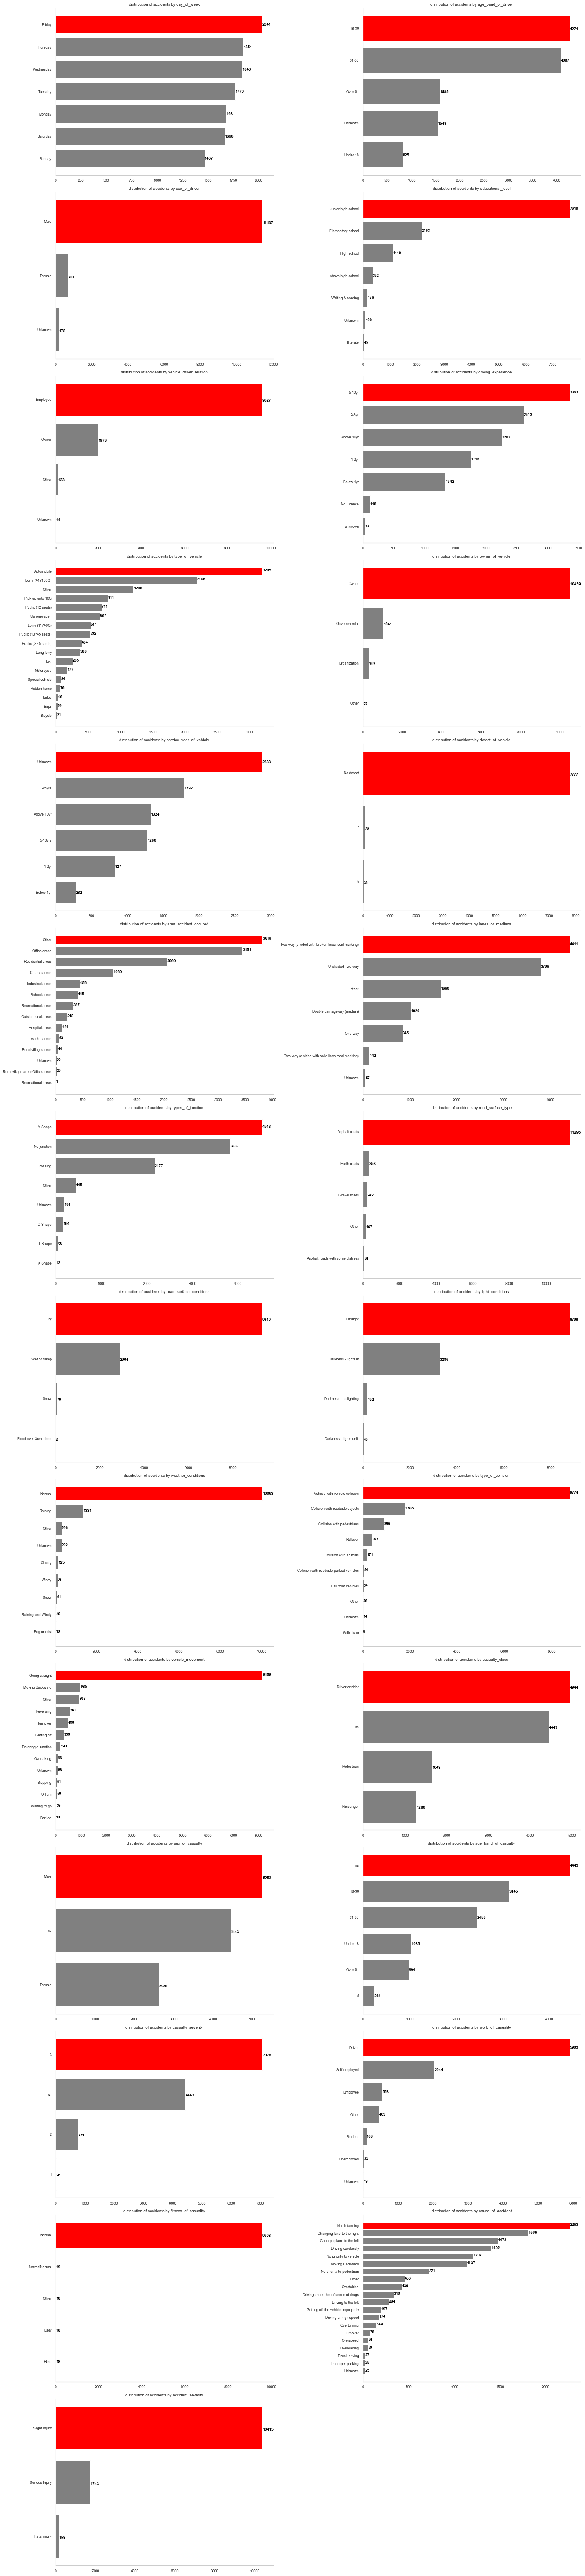

In [354]:
plt.figure(figsize=(20,100))
plot_number =1
for col in df.drop(['hour', 'minute','road_allignment','pedestrian_movement','number_of_casualties','number_of_vehicles_involved'],axis=1):
    df5=df.groupby(col).size()
    df5 =df5.sort_values()
    ax=plt.subplot(16,2,plot_number)
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    plt.grid(visible=False)
    plt.title('distribution of accidents by '+ col )
    indexlist = df5.index.tolist()
    ix =indexlist.index(df5.idxmax())
    colors =["red" if i==ix else "grey" for i in range(df5.shape[0])]
    plt.barh(df5.index,df5,color=colors)
    for i,v in enumerate(df5):
        plt.text(v,i-0.05,str(v),color="Black",fontweight='bold')
    plot_number+=1
plt.tight_layout()

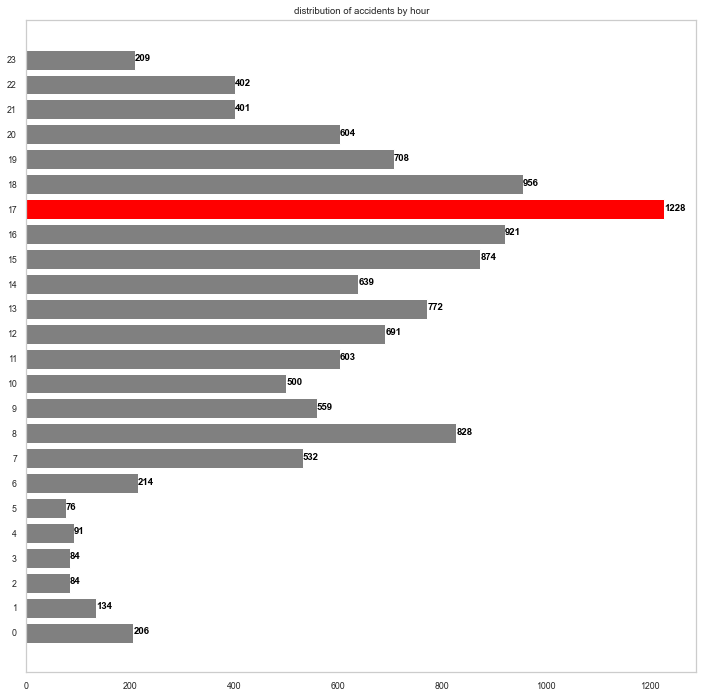

In [355]:
df2=df.groupby(['hour']).size()
fig= plt.figure(figsize=(12,12))
plt.title("distribution of accidents by hour")
plt.grid(visible=False)
indexlist = df2.index.tolist()
ix =indexlist.index(df2.idxmax())
colors =["red" if i==ix else "grey" for i in range(df2.shape[0])]
plt.barh(df2.index,df2,color=colors)
plt.yticks(df2.index)

for i, v in enumerate(df2):
    plt.text(v,i-0.05,str(v),color="Black",fontweight='bold')

plt.show()

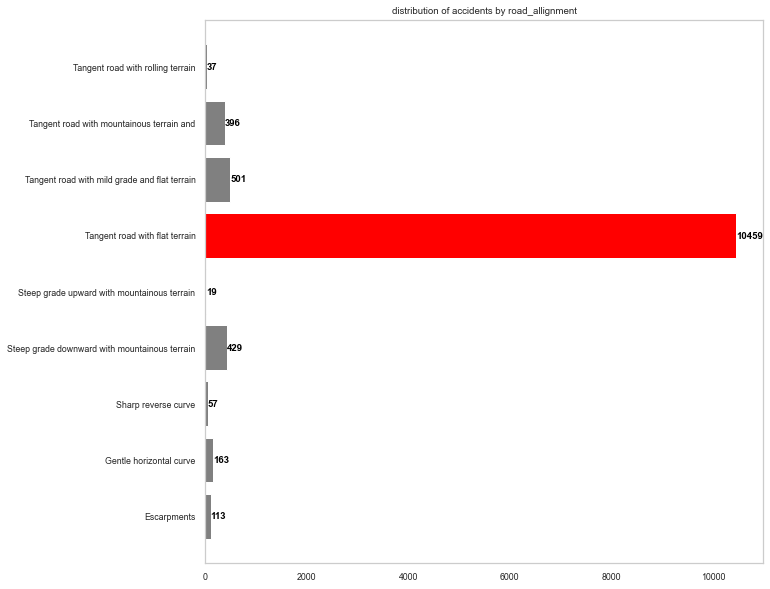

In [356]:
df2=df.groupby(['road_allignment']).size()
fig= plt.figure(figsize=(10,10))
plt.title("distribution of accidents by road_allignment")
plt.grid(visible=False)
indexlist = df2.index.tolist()
ix =indexlist.index(df2.idxmax())
colors =["red" if i==ix else "grey" for i in range(df2.shape[0])]
plt.barh(df2.index,df2,color=colors)
plt.yticks(df2.index)

for i, v in enumerate(df2):
    plt.text(v,i-0.05,str(v),color="Black",fontweight='bold')

plt.show()

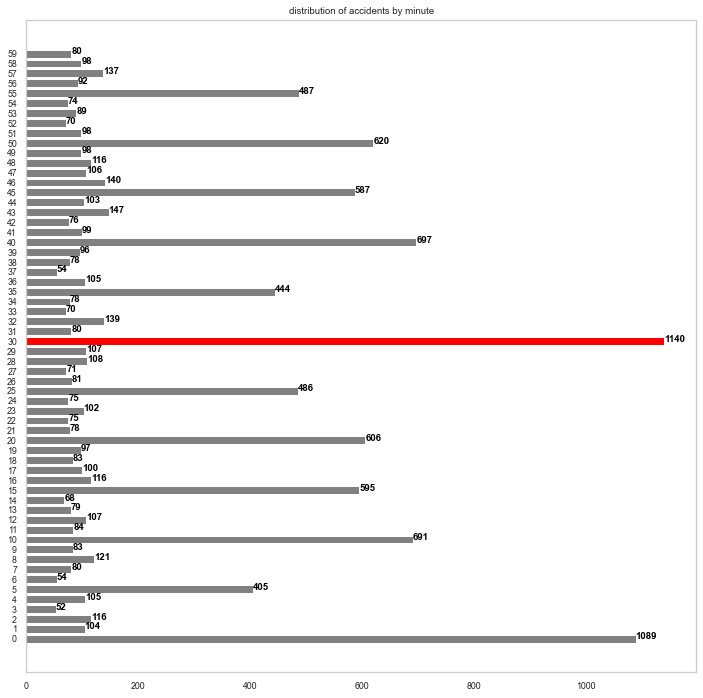

In [357]:
df2=df.groupby(['minute']).size()
fig= plt.figure(figsize=(12,12))
plt.title("distribution of accidents by minute")
plt.grid(visible=False)
indexlist = df2.index.tolist()
ix =indexlist.index(df2.idxmax())
colors =["red" if i==ix else "grey" for i in range(df2.shape[0])]
plt.barh(df2.index,df2,color=colors)
plt.yticks(df2.index)

for i, v in enumerate(df2):
    plt.text(v,i-0.05,str(v),color="Black",fontweight='bold')

plt.show()

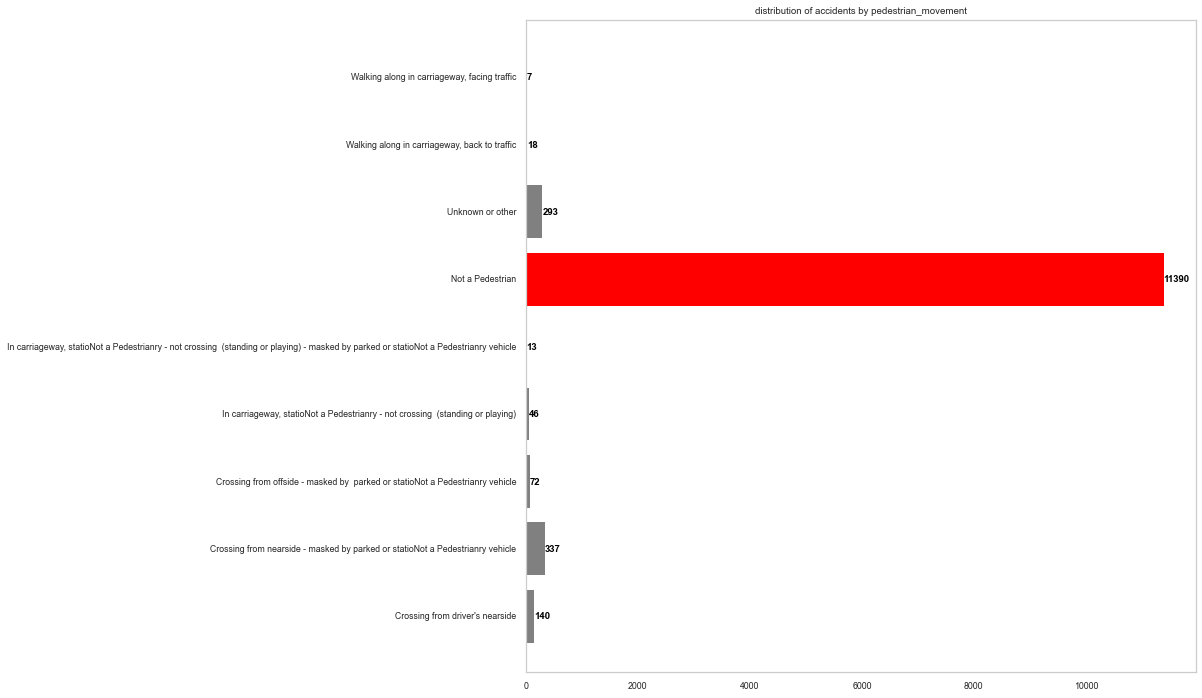

In [358]:
df2=df.groupby(['pedestrian_movement']).size()
fig= plt.figure(figsize=(12,12))
plt.title("distribution of accidents by pedestrian_movement")
plt.grid(visible=False)
indexlist = df2.index.tolist()
ix =indexlist.index(df2.idxmax())
colors =["red" if i==ix else "grey" for i in range(df2.shape[0])]
plt.barh(df2.index,df2,color=colors)
plt.yticks(df2.index)

for i, v in enumerate(df2):
    plt.text(v,i-0.05,str(v),color="Black",fontweight='bold')

plt.show()

In [359]:
categorical_columns=[]
numerical_columns =[]
for col in df.columns.tolist():
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    elif df[col].dtype=='int64':
        numerical_columns.append(col)
    else:
        pass
print(categorical_columns)
print(40*'*')
print(numerical_columns)

['day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity']
****************************************
['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'minute']


In [360]:
df2=df.groupby(['accident_severity']).size()
df2

accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

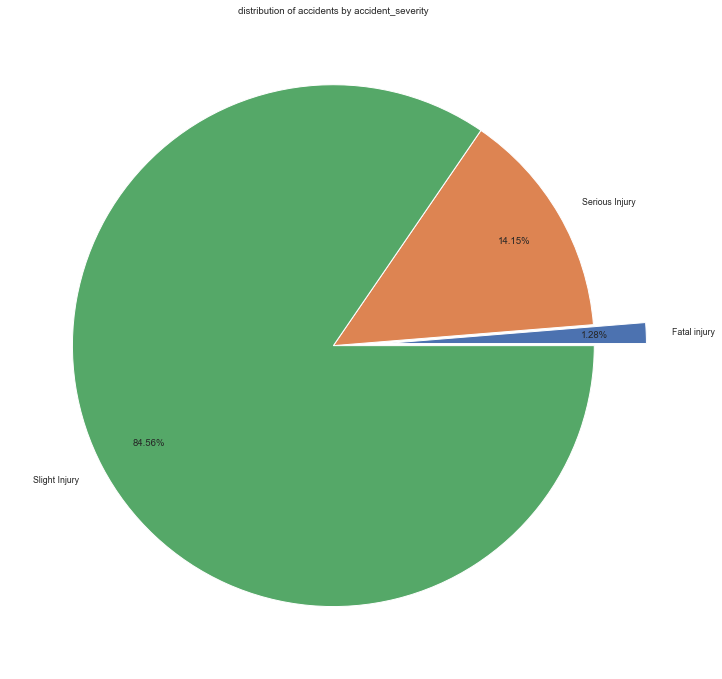

In [361]:
df2=df.groupby(['accident_severity']).size()
fig= plt.figure(figsize=(12,12))
plt.title("distribution of accidents by accident_severity")
myexplode = [0.2, 0, 0]
plt.pie(df2,labels=list(df2.index),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=False,
        explode=myexplode)
plt.show()

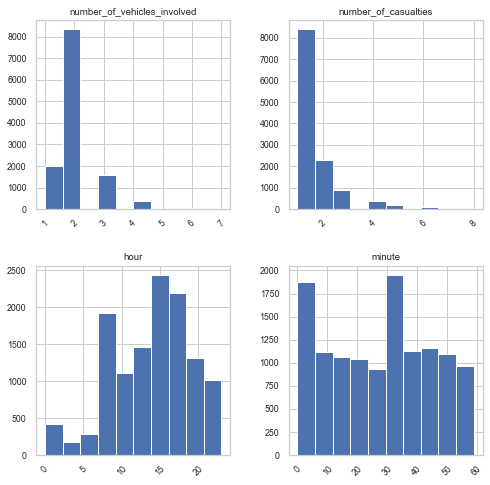

In [362]:
df.hist(figsize=(8,8), xrot=45)
plt.show()

In [363]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
         # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [364]:
missing_values_table_df=missing_values_table(df)
missing_values_table_df

Your selected dataframe has 33 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
defect_of_vehicle,4427,35.9
service_year_of_vehicle,3928,31.9
work_of_casuality,3198,26.0
fitness_of_casuality,2635,21.4
type_of_vehicle,950,7.7
types_of_junction,887,7.2
driving_experience,829,6.7
educational_level,741,6.0
vehicle_driver_relation,579,4.7
owner_of_vehicle,482,3.9


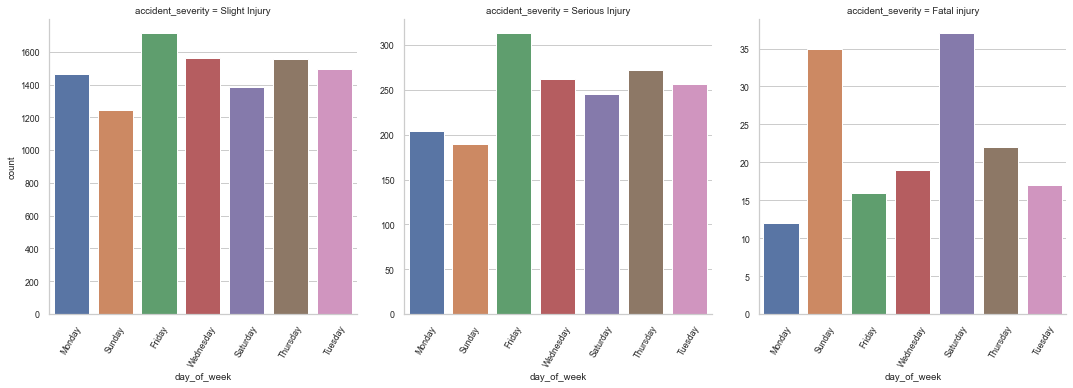

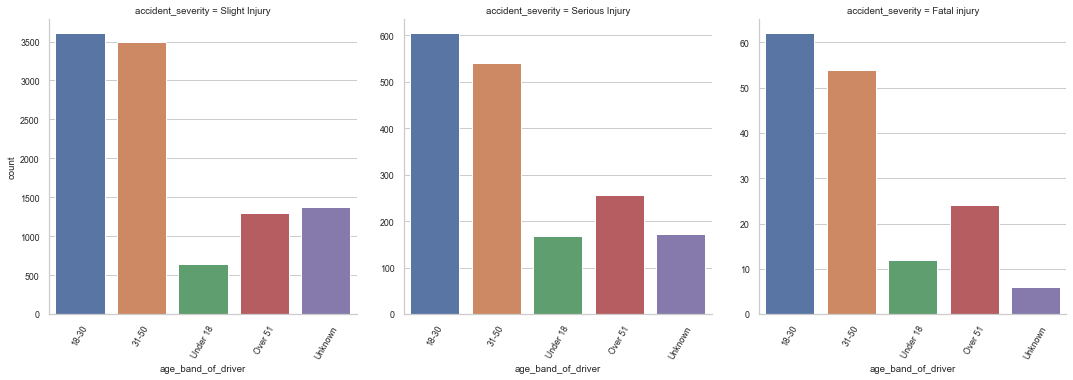

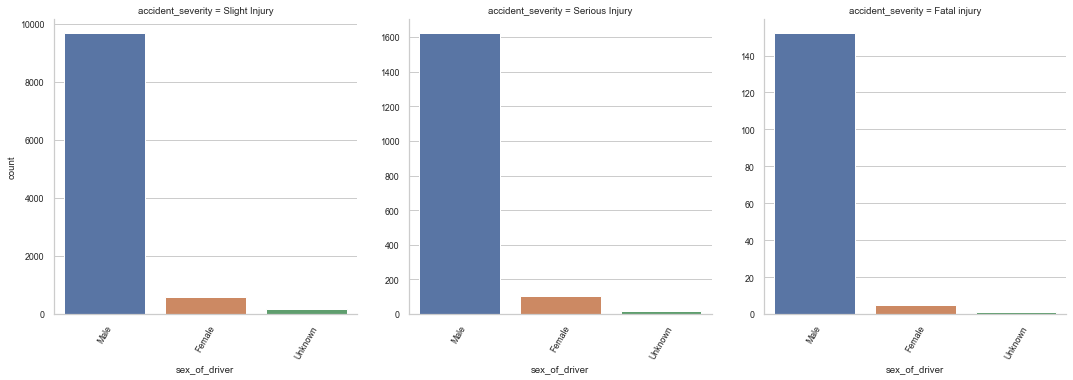

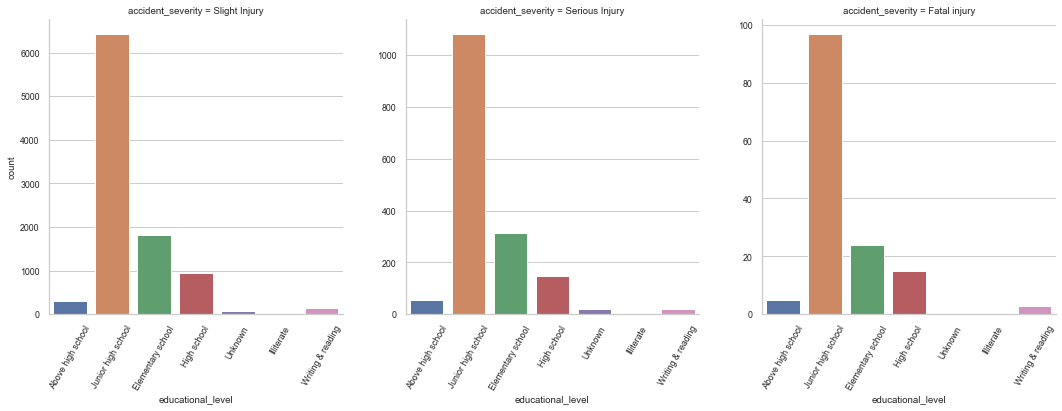

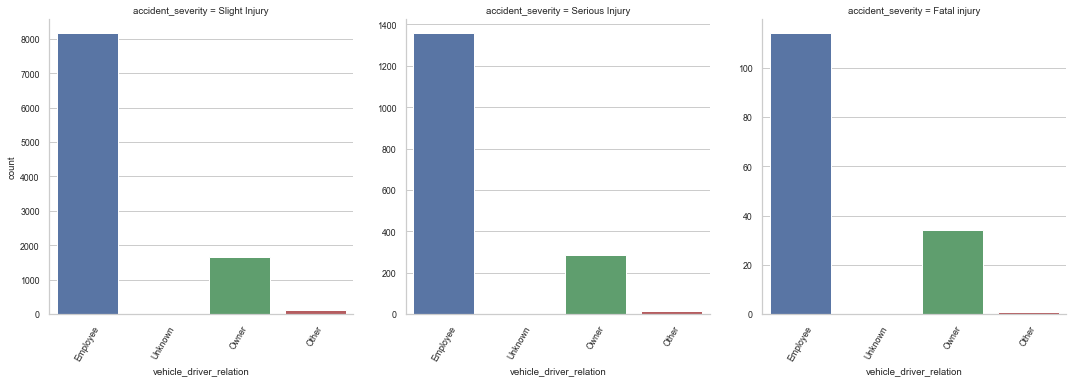

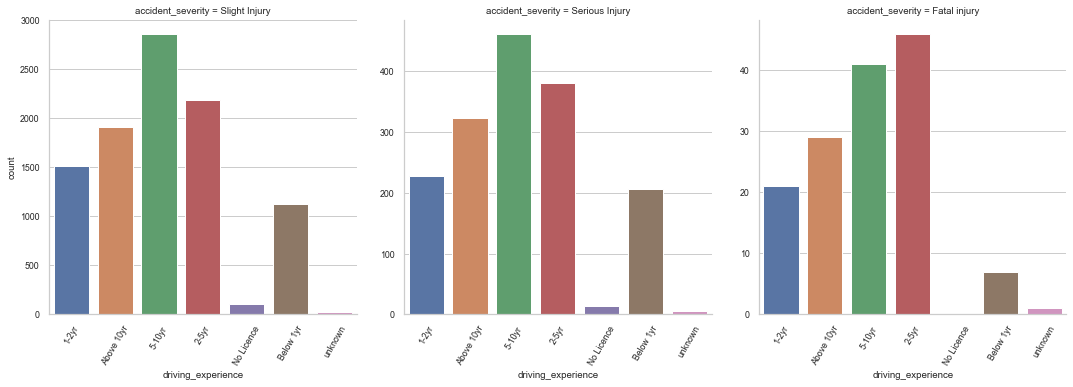

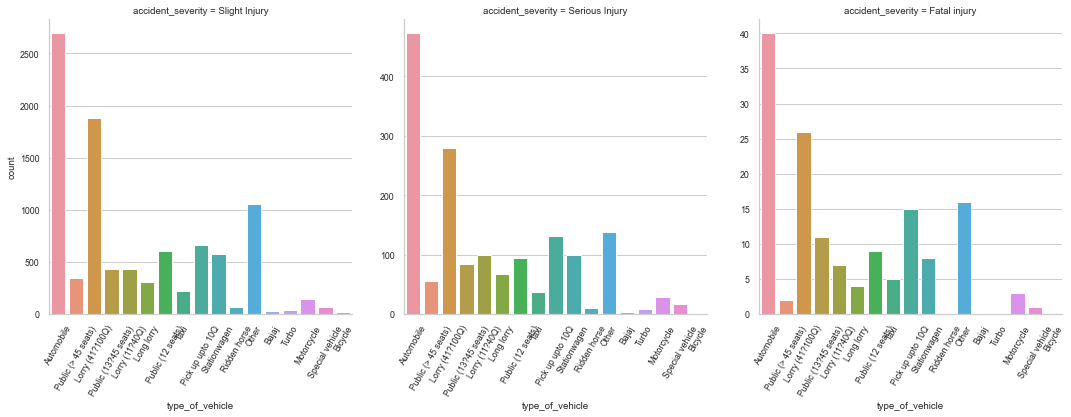

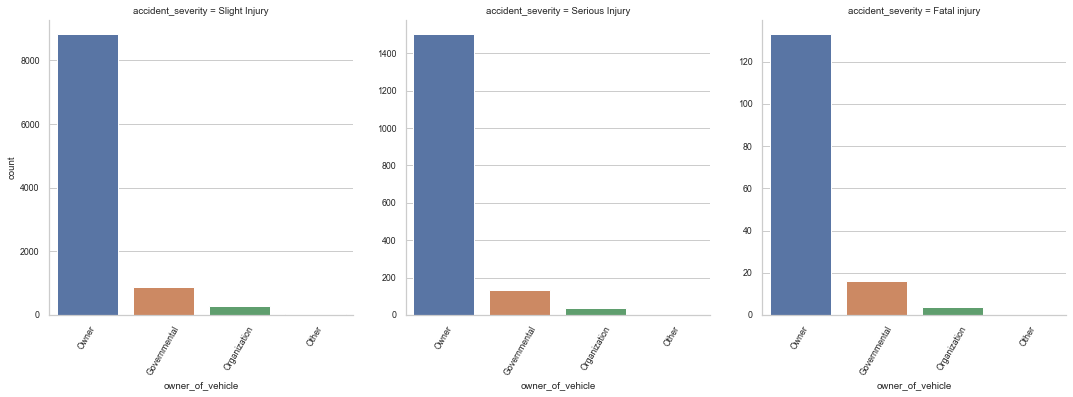

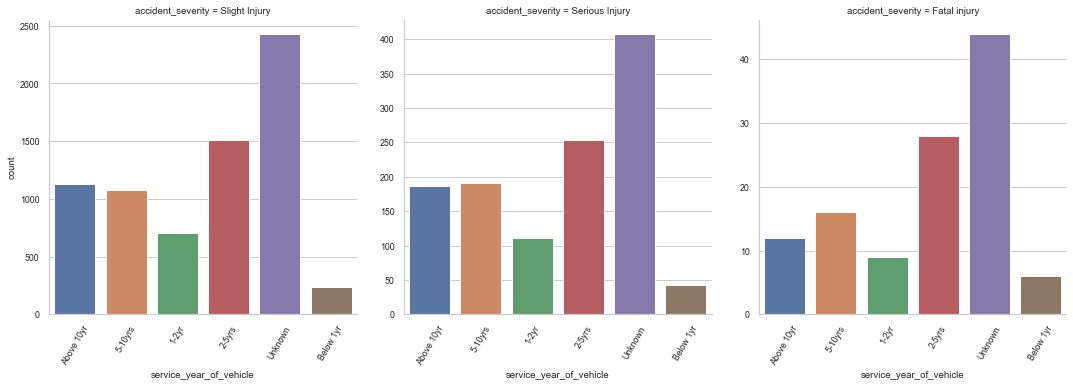

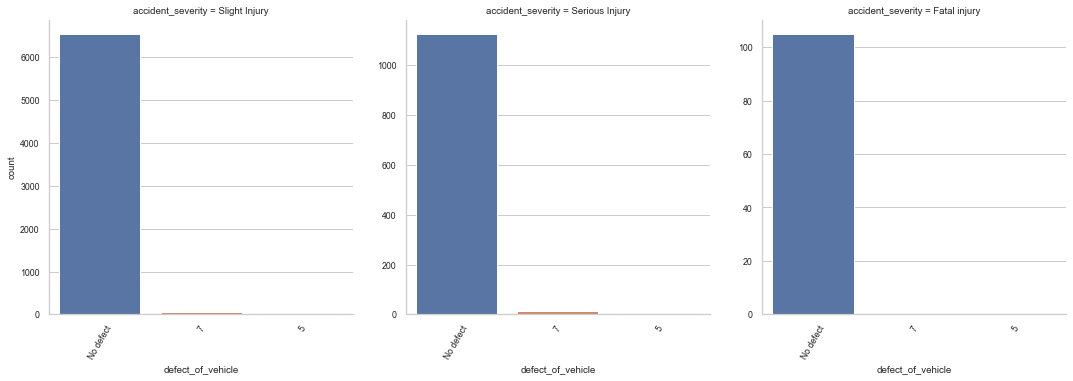

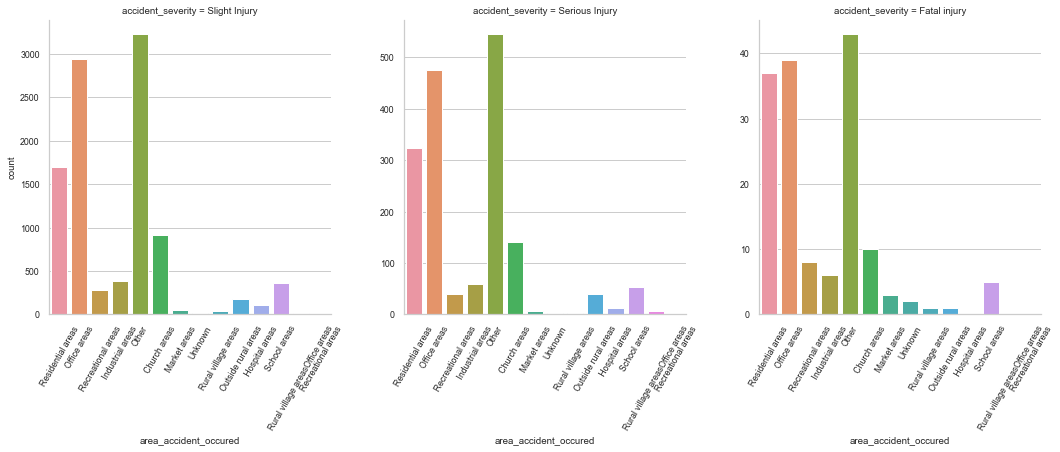

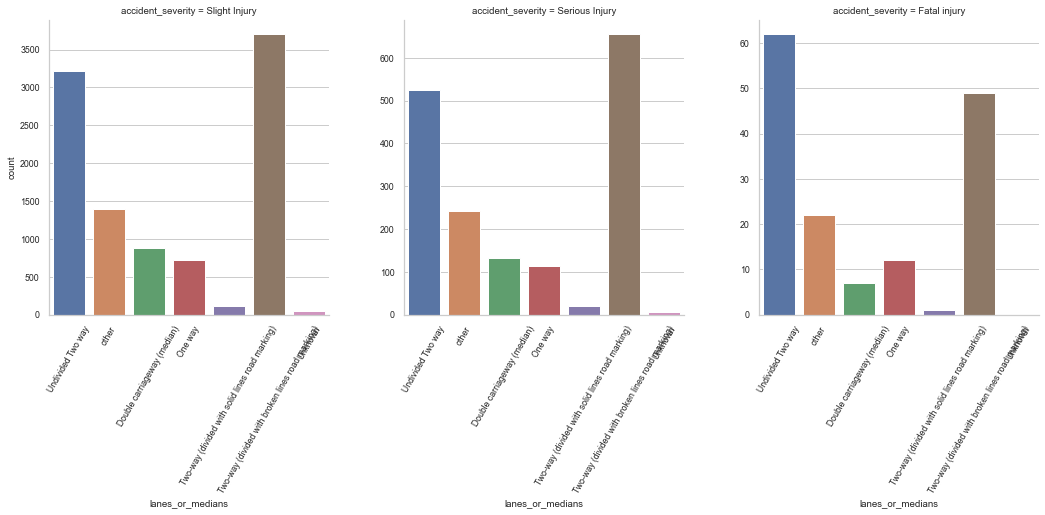

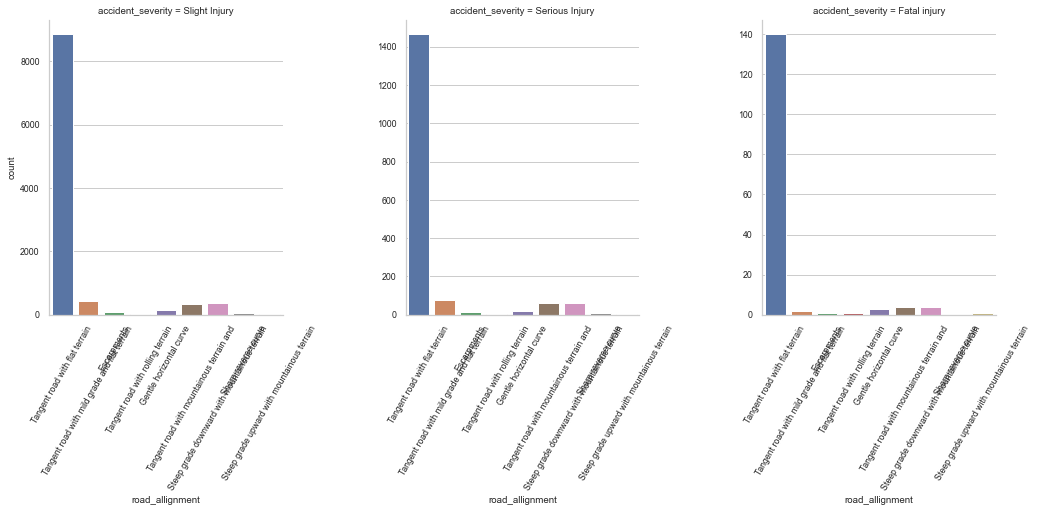

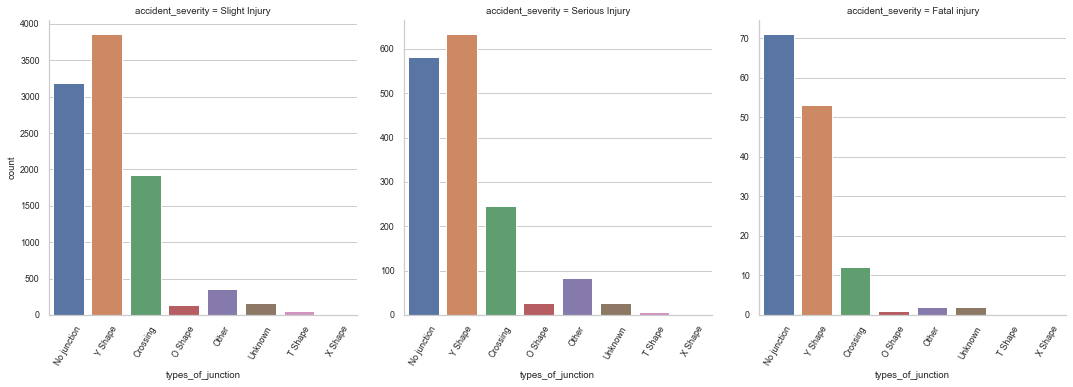

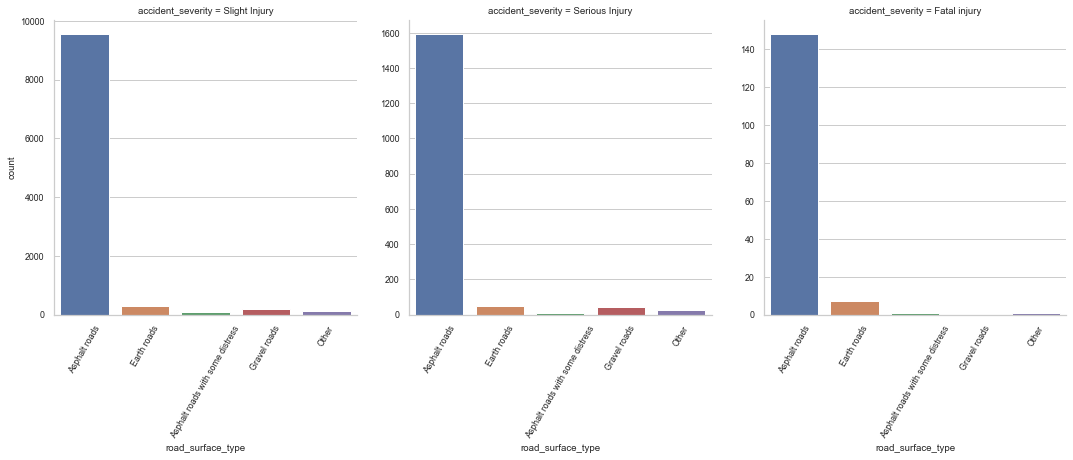

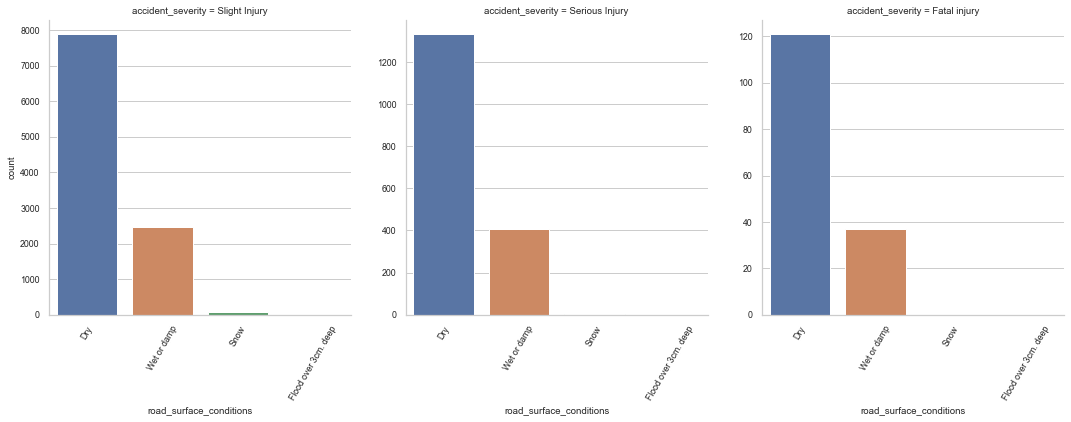

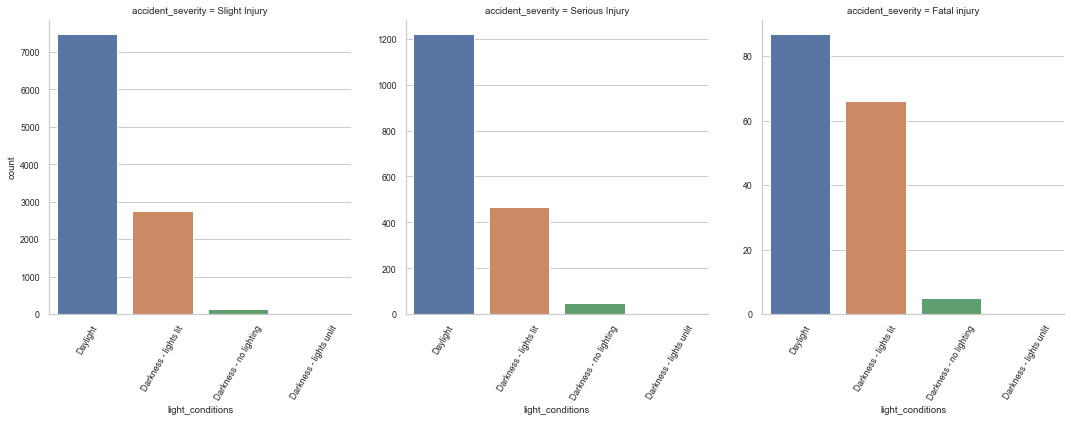

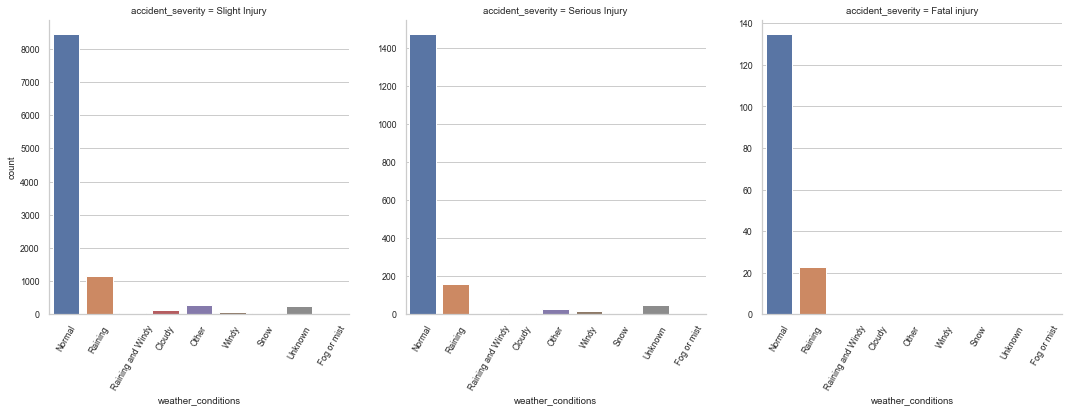

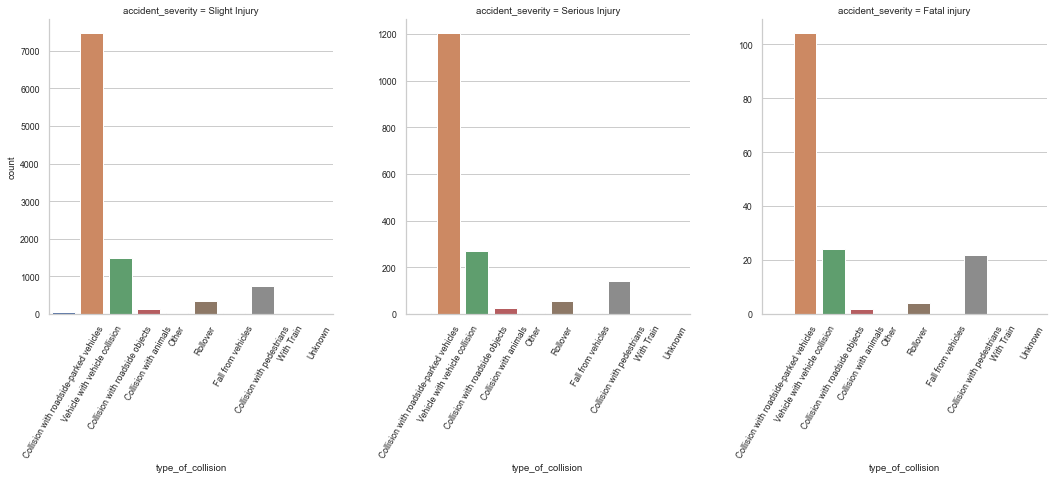

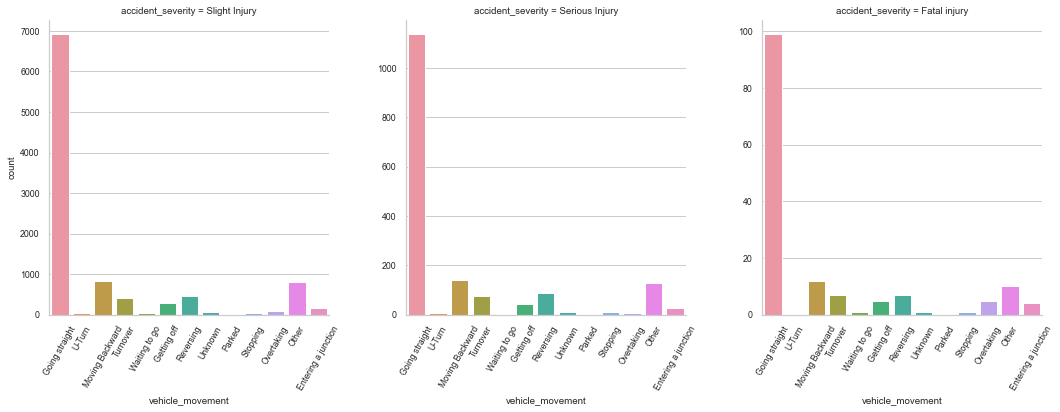

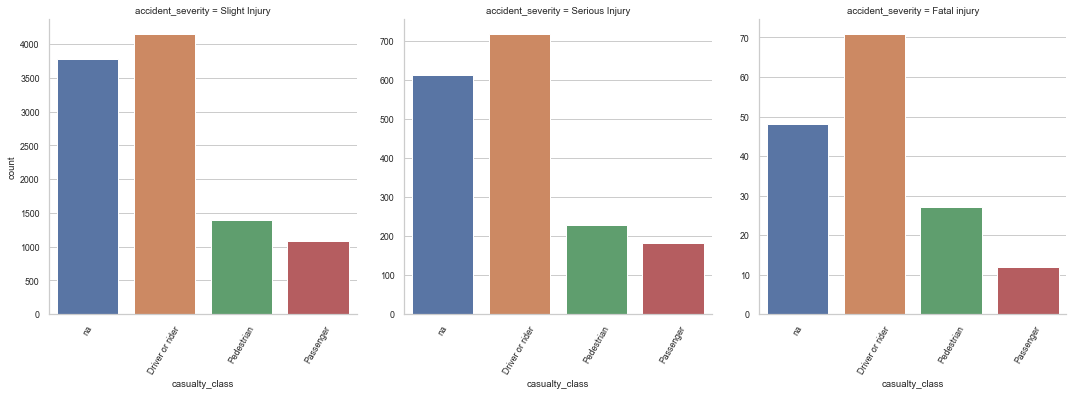

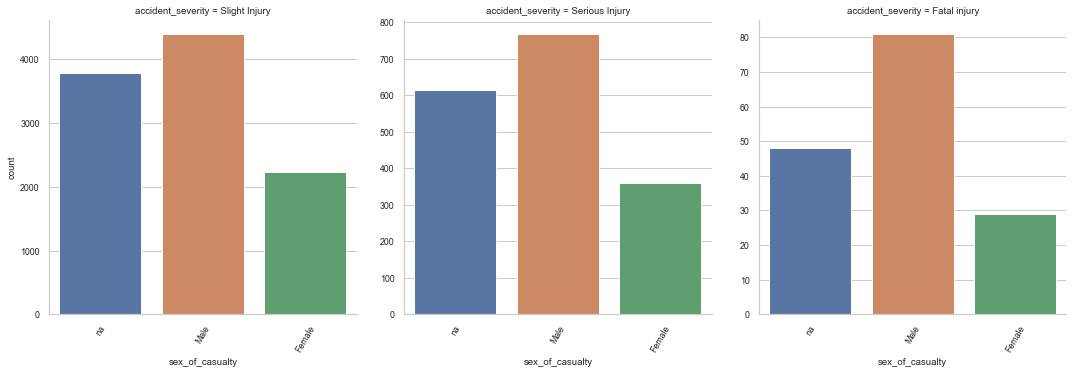

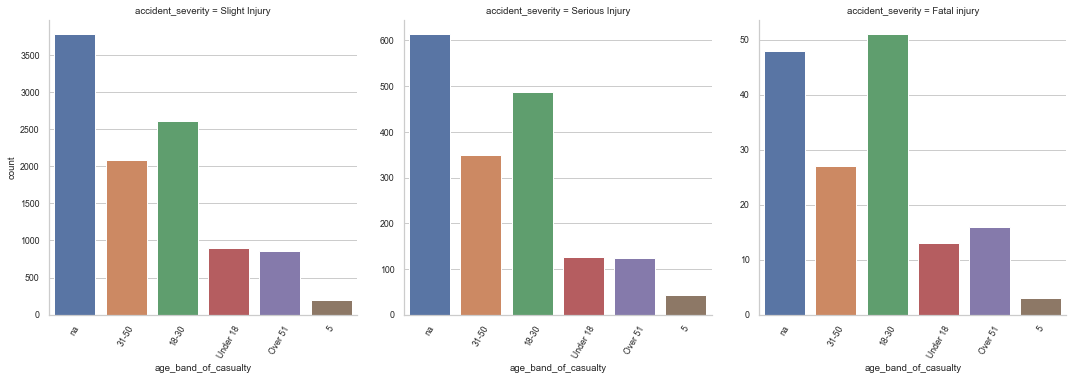

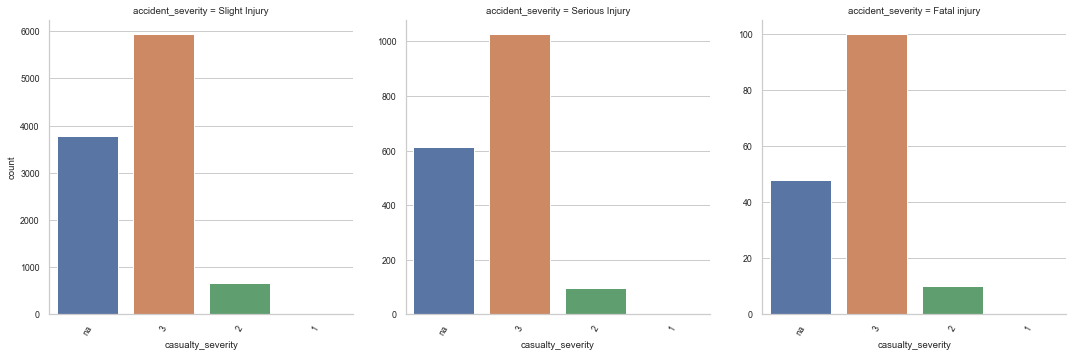

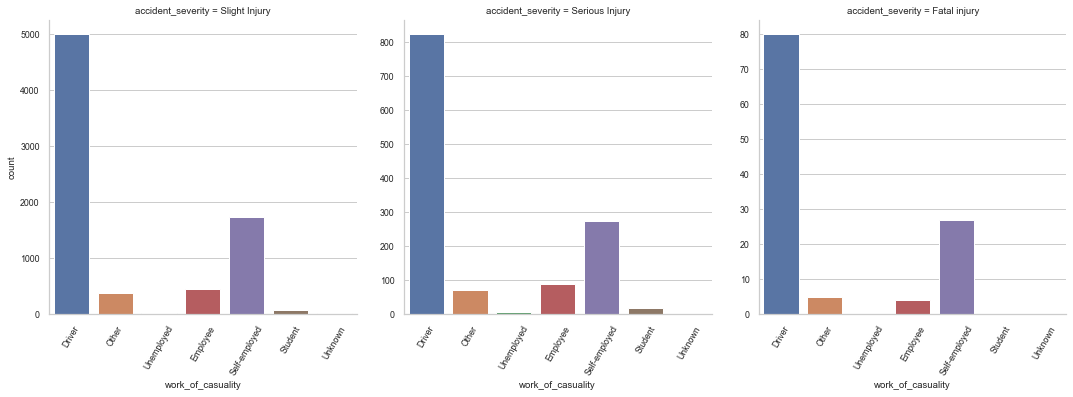

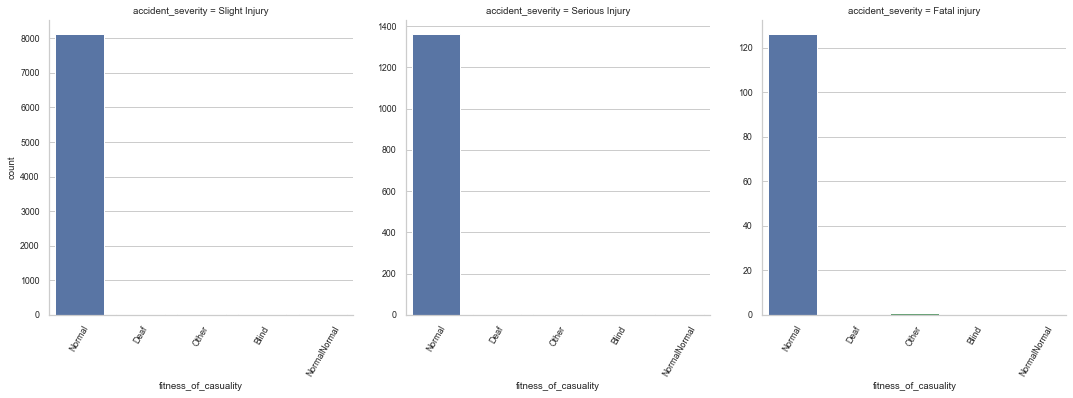

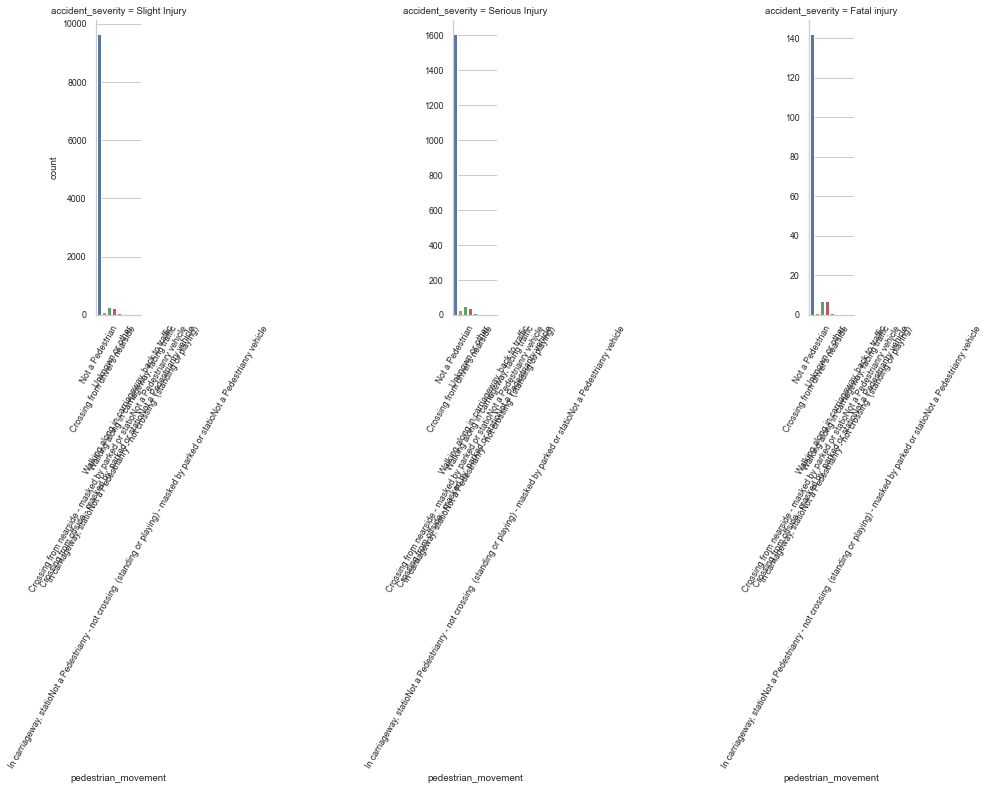

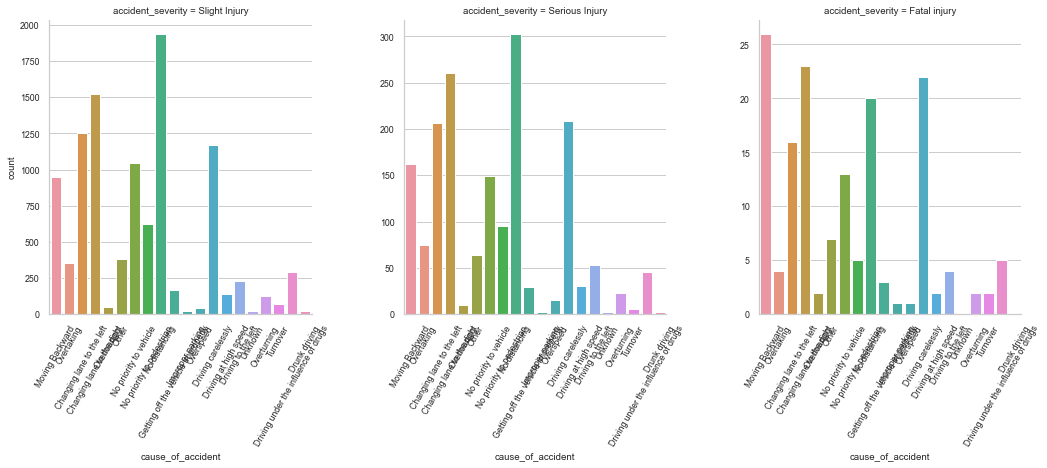

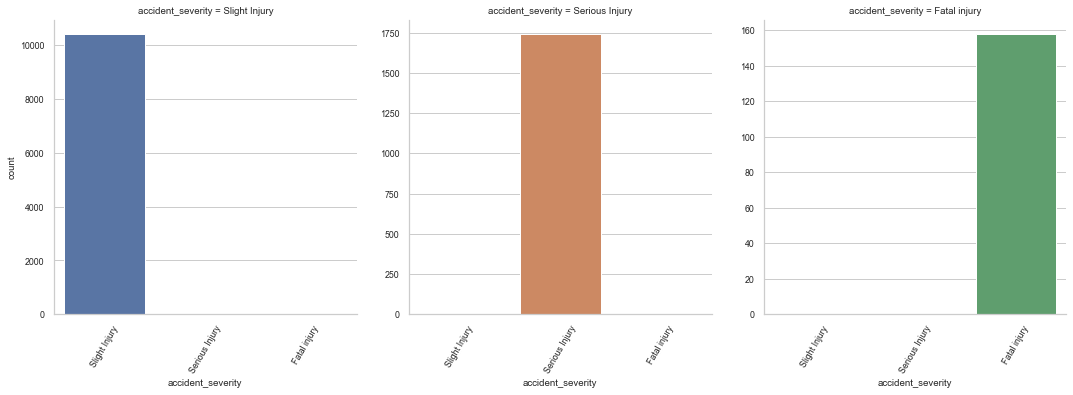

In [365]:

for col in categorical_columns:
        # display(pd.crosstab(df['accident_severity'], df[col], normalize='index'))
        g = sns.catplot(x = col, kind='count', col = 'accident_severity', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

In [366]:
df.drop(columns = ['defect_of_vehicle', 'vehicle_driver_relation', 'work_of_casuality', 'fitness_of_casuality','service_year_of_vehicle'], inplace=True)

In [367]:
df

,day_of_week,age_band_of_driver,sex_of_driver,educational_level,driving_experience,type_of_vehicle,owner_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_movement,cause_of_accident,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Residential areas,NaN,Tangent road with flat terrain,...,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,NaN,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,2-5yr,NaN,Owner,Industrial areas,other,Tangent road with flat terrain,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain,...,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury,16,15
12312,Sunday,Unknown,Male,Elementary school,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,...,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury,18,0
12313,Sunday,Over 51,Male,Junior high school,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,...,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury,13,55
12314,Sunday,18-30,Female,Junior high school,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and,...,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,55


<AxesSubplot:>

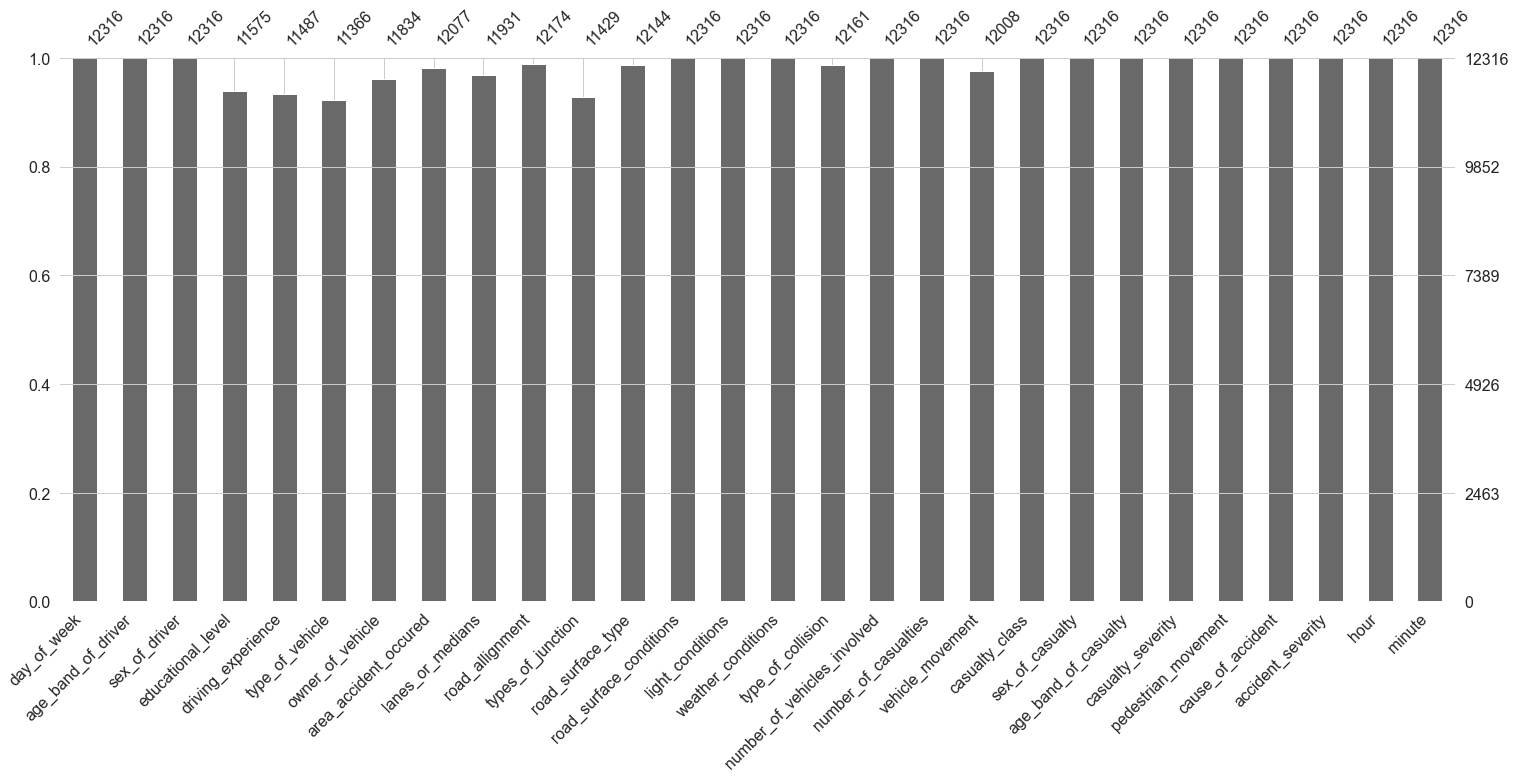

In [368]:
msno.bar(df)

In [369]:
missing_values_table_df=missing_values_table(df)
mode_df=pd.DataFrame(columns=['col','mode'])
for col in missing_values_table_df.index.tolist():
    mode= df[col].mode()[0]
    row = {'col':col,'mode':mode}
    mode_df=mode_df.append(row,ignore_index=True)
    df[col].fillna(mode, inplace=True)

mode_df.set_index('col',inplace=True)

mode_df.to_csv('..\Model\mode.csv')
mode_df

Your selected dataframe has 28 columns.
There are 11 columns that have missing values.


,mode
col,
type_of_vehicle,Automobile
types_of_junction,Y Shape
driving_experience,5-10yr
educational_level,Junior high school
owner_of_vehicle,Owner
lanes_or_medians,Two-way (divided with broken lines road marking)
vehicle_movement,Going straight
area_accident_occured,Other
road_surface_type,Asphalt roads


<AxesSubplot:>

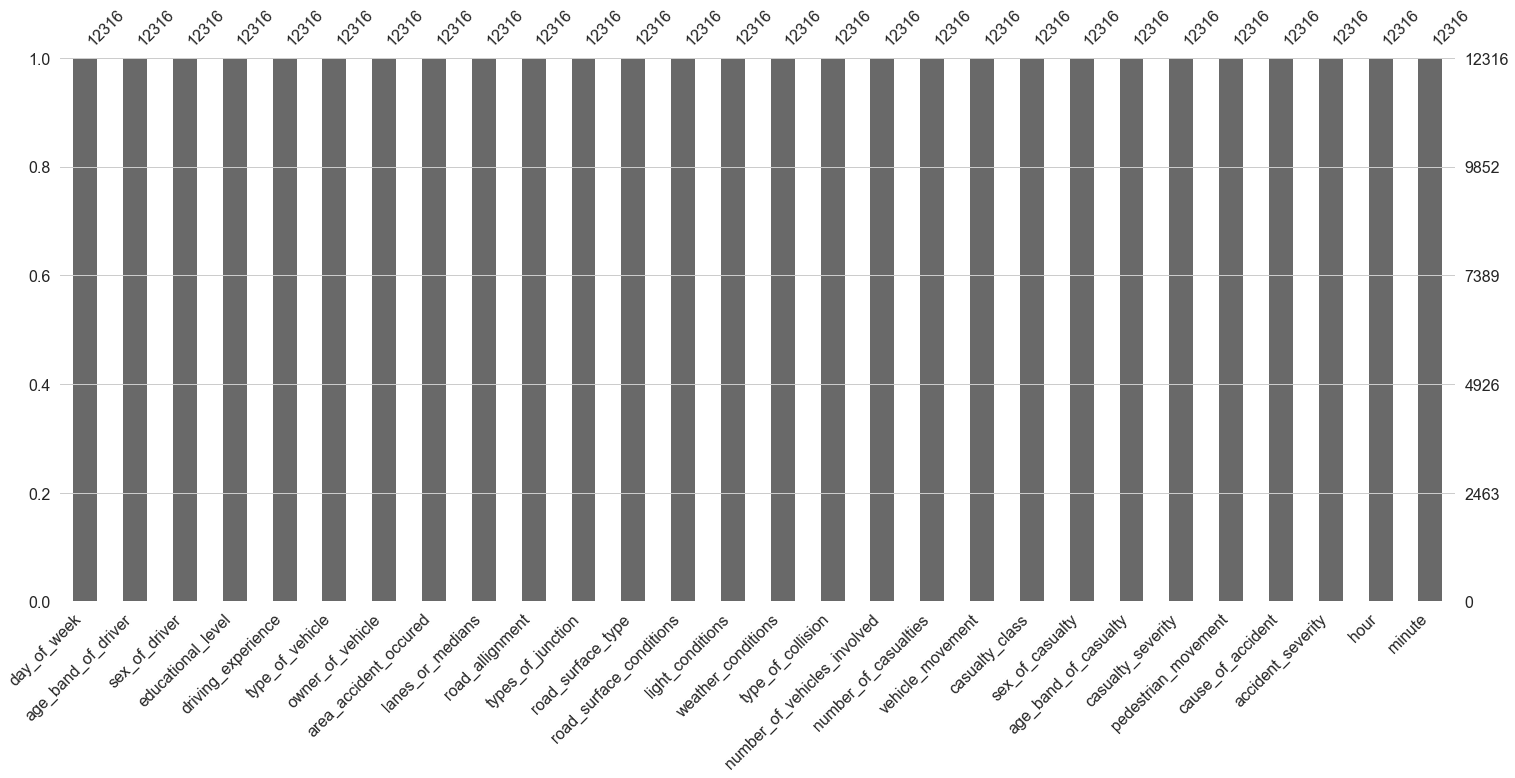

In [370]:
msno.bar(df)

In [371]:

X = df.drop('accident_severity', axis=1)
print(type(X))
X_COLS = X.columns.tolist()
y = df['accident_severity']
enc = OrdinalEncoder()
X=enc.fit_transform(X)
joblib.dump(enc,'..\Model\X_Encoder.pkl')
X =pd.DataFrame(X,columns=X_COLS)
print(type(X))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [372]:
X

,day_of_week,age_band_of_driver,sex_of_driver,educational_level,driving_experience,type_of_vehicle,owner_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,...,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_movement,cause_of_accident,hour,minute
0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0,2.0,5.0,...,1.0,2.0,3.0,2.0,5.0,3.0,5.0,9.0,17.0,2.0
1,1.0,1.0,1.0,4.0,3.0,11.0,3.0,6.0,4.0,5.0,...,1.0,2.0,3.0,2.0,5.0,3.0,5.0,16.0,17.0,2.0
2,1.0,0.0,1.0,4.0,0.0,5.0,3.0,1.0,6.0,5.0,...,1.0,2.0,0.0,1.0,1.0,2.0,5.0,0.0,17.0,2.0
3,3.0,0.0,1.0,4.0,2.0,11.0,0.0,6.0,6.0,6.0,...,1.0,2.0,2.0,0.0,0.0,2.0,5.0,1.0,1.0,6.0
4,3.0,0.0,1.0,4.0,1.0,0.0,3.0,4.0,6.0,5.0,...,1.0,2.0,3.0,2.0,5.0,3.0,5.0,16.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6.0,1.0,1.0,4.0,1.0,4.0,3.0,5.0,4.0,5.0,...,0.0,2.0,3.0,2.0,5.0,3.0,5.0,10.0,16.0,15.0
12312,3.0,4.0,1.0,1.0,2.0,0.0,3.0,5.0,2.0,0.0,...,0.0,4.0,3.0,2.0,5.0,3.0,5.0,10.0,18.0,0.0
12313,3.0,2.0,1.0,4.0,2.0,1.0,3.0,5.0,2.0,7.0,...,0.0,4.0,0.0,1.0,1.0,2.0,5.0,1.0,13.0,55.0
12314,3.0,0.0,0.0,4.0,3.0,5.0,3.0,6.0,4.0,7.0,...,0.0,4.0,3.0,2.0,5.0,3.0,5.0,5.0,13.0,55.0


<AxesSubplot:>

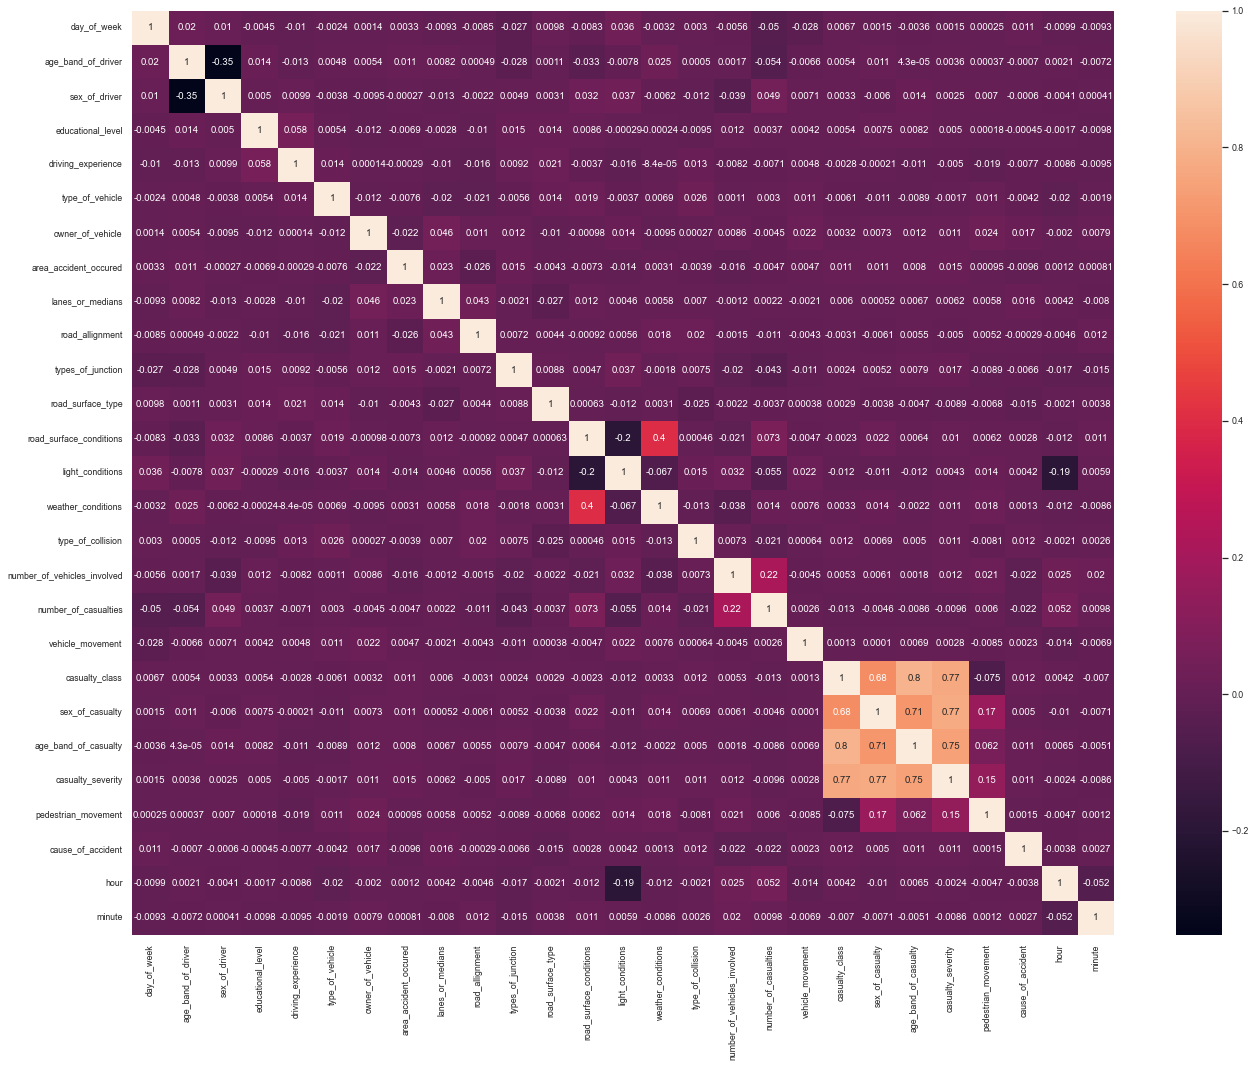

In [373]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(X.corr(), annot=True)

In [374]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=32,shuffle=True)

In [375]:
def calc_class_percentage(y_train):
    counter = Counter(y_train)
    print("=============================")
    for k,v in counter.items():
        per = 100*v/len(y_train)
        print(f"Class= {k}, n={v} ({per:.2f}%)")

In [376]:
calc_class_percentage(y_train)
smote = SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
calc_class_percentage(y_train)

Class= Slight Injury, n=7818 (84.64%)
Class= Serious Injury, n=1297 (14.04%)
Class= Fatal injury, n=122 (1.32%)
Class= Slight Injury, n=7818 (33.33%)
Class= Serious Injury, n=7818 (33.33%)
Class= Fatal injury, n=7818 (33.33%)


In [377]:
enc = OrdinalEncoder()
y_train=enc.fit_transform(np.array(y_train).reshape(-1,1))
joblib.dump(enc,'..\Model\Y_Encoder.pkl')
y_test=enc.fit_transform(np.array(y_test).reshape(-1,1))



In [378]:


def plot_confusion_perf(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    Accuracy  =  accuracy_score(y_test, y_pred)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
    print(f"Accuracy Score: {Accuracy}")
    print(f"Precision: {Precision}")
    print(f"Recall: {Recall}")
    print(f"F1_score: {F1_score}")
    return disp

Accuracy Score: 0.4527443975316661
Precision: 0.7678369568346844
Recall: 0.4527443975316661
F1_score: 0.5466353395191335


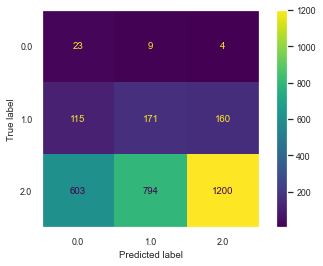

In [379]:


model= LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred= model.predict(X_test)
disp =plot_confusion_perf(y_test,y_pred,model)
disp.plot()
plt.grid(False)
plt.show()

Accuracy Score: 0.849626502111075
Precision: 0.8360806533290108
Recall: 0.849626502111075
F1_score: 0.7910763484624462


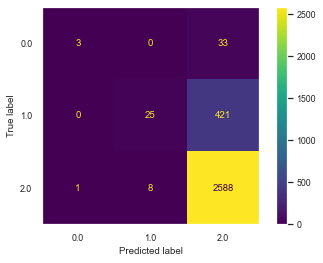

In [380]:


rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,rf)
disp.plot()
plt.grid(False)
plt.show()

Accuracy Score: 0.8070802208509257
Precision: 0.7477314000018206
Recall: 0.8070802208509257
F1_score: 0.7709996645087625


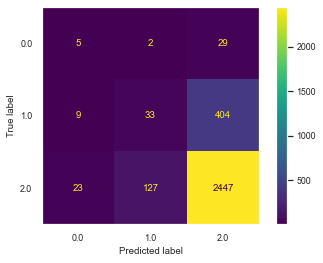

In [381]:

ab= AdaBoostClassifier(n_estimators=200)
ab.fit(X_train,y_train)
y_pred =ab.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,ab)
disp.plot()
plt.grid(False)
plt.show()

Accuracy Score: 0.8467034751542709
Precision: 0.820886024627711
Recall: 0.8467034751542709
F1_score: 0.7882544387737228


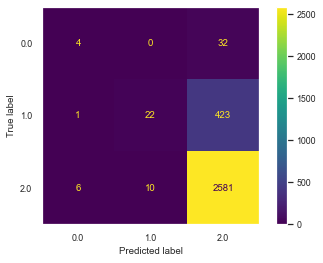

In [382]:

gtb= GradientBoostingClassifier(n_estimators=200)
gtb.fit(X_train,y_train)
y_pred =gtb.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,gtb)
disp.plot()
plt.grid(False)
plt.show()

Accuracy Score: 0.7294576161091263
Precision: 0.7667546744488845
Recall: 0.7294576161091263
F1_score: 0.7462020103809848


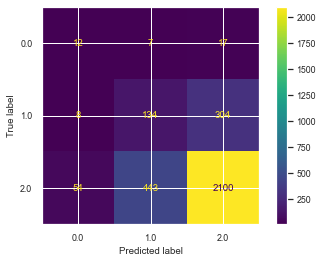

In [383]:

dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,dtc)
disp.plot()
plt.show()

Accuracy Score: 0.849626502111075
Precision: 0.8398488969027726
Recall: 0.849626502111075
F1_score: 0.7900503935411256


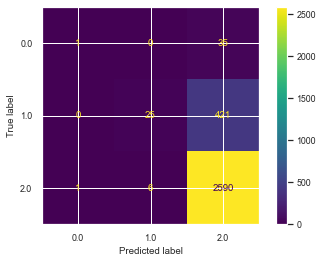

In [384]:

etc=ExtraTreesClassifier(random_state=0)
etc.fit(X_train,y_train)
y_pred= etc.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred,etc)
disp.plot()
plt.show()

In [385]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [386]:


gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini','entropy'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
    'min_samples_leaf': [2,3],
    'class_weight': ['balanced', None]
}

rf_estimator = RandomForestClassifier()

gsearch = GridSearchCV(
    estimator= rf_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)

rf_model = gsearch.fit(X=X_train, y=y_train)


Fitting 3 folds for each of 256 candidates, totalling 768 fits


Accuracy Score: 0.8470282559272491
Precision: 0.8219940438230511
Recall: 0.8470282559272491
F1_score: 0.787013368917508


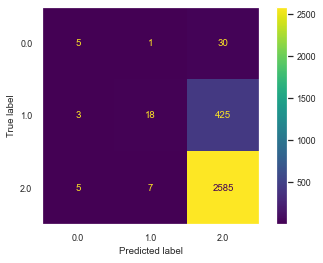

In [387]:
rf_tuned = RandomForestClassifier(ccp_alpha = 0.0,
                                criterion = 'entropy',
                                min_samples_split = 2,
                                min_samples_leaf=2,
                                class_weight = None,
                                max_depth = 11,
                                n_estimators = 400)

rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
disp=plot_confusion_perf(y_test,y_pred_tuned,rf_tuned)
disp.plot()
plt.grid(False)
plt.show()

In [390]:
joblib.dump(rf_tuned,'..\Model\model.pkl')

['..\\Model\\model.pkl']

In [389]:
import os

print(os.getcwd())

D:\RTA\Notebook
